<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving out.dbpedia-similar to out (1).dbpedia-similar


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [5]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import csv
import pandas as pd

column_names = ["Node1", "Node2"]
g_dataframe = pd.read_csv(r"out.dbpedia-similar", sep=' ', skiprows=2, names=column_names)
print(g_dataframe)

#print(g_dataframe["Node2"].iloc[4])
#print(type(g_dataframe["Node2"].iloc[4]))

column_nodes = g_dataframe[["Node1", "Node2"]].values.ravel()
unique_nodes = pd.unique(column_nodes)
sorted_unique = np.sort(unique_nodes)

#print("Number of Nodes:", initial_node_count)
#initial_connected_components =  #uncomment and complete

G_graph_initial = nx.Graph()
with open('out.dbpedia-similar') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    next(csv_reader)
    next(csv_reader)
    for row in csv_reader:
        G_graph_initial.add_edge(row[0],row[1])
        #print("type is:", type(row[0]))
        line_count += 1

G_graph_initial_backup = G_graph_initial.copy()
        
print("Number of Nodes:", G_graph_initial.number_of_nodes())
print("Number of Edges:", G_graph_initial.number_of_edges())
print("Number of Connected Components:", nx.number_connected_components(G_graph_initial))

#initial_node_count = np.size(sorted_unique)
initial_node_count = G_graph_initial.number_of_nodes()
initial_edge_count = G_graph_initial.number_of_edges()
initial_connected_components = nx.number_connected_components(G_graph_initial)

degree_centrality = nx.degree_centrality(G_graph_initial) 
avg_degree = np.mean(list(degree_centrality.values()))

print("Average node degree:", avg_degree)

     Node1  Node2
0        1      2
1        1      3
2        1      4
3        1      5
4        2      3
..     ...    ...
560    423    424
561    423    425
562    426    427
563    428    429
564    428    430

[565 rows x 2 columns]
Number of Nodes: 430
Number of Edges: 565
Number of Connected Components: 95
Average node degree: 0.006125657288447986


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [6]:
ad_mx = nx.adjacency_matrix(G_graph_initial)
array_ad_mx = ad_mx.toarray()
#print(array_ad_mx)
unconnected_edges = []

#for i in range(0, 215):
#    for j in range(i, 430):
#        if array_ad_mx[i][j] == 0:
#            unconnected_edges.append((i,j))

for i in range(0, 430):
    for j in range(0, 430):
        if array_ad_mx[i][j] == 0:
            unconnected_edges.append((i+1,j+1))

#print(unconnected_edges)
print("Number of unconnected pairs:", len(unconnected_edges))
print(type(unconnected_edges[0][0]))

Number of unconnected pairs: 183771
<class 'int'>


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [7]:
# removable edges: check splitting and number of nodes
#if ( == initial_connected_components) and ( == initial_node_count): #uncomment and complete (modifications allowed)
# G_graph_initial cell contains a character not an int!
removable_edges = []
for row in range(0, initial_edge_count):
    G_graph_initial.remove_edge(str(g_dataframe["Node1"].iloc[row]), str(g_dataframe["Node2"].iloc[row]))
    if (nx.number_connected_components(G_graph_initial) == initial_connected_components and 
        G_graph_initial.number_of_nodes() == initial_node_count):
        removable_edges.append((int(g_dataframe["Node1"].iloc[row]), int(g_dataframe["Node2"].iloc[row])))
    else:
        G_graph_initial.add_edge(str(g_dataframe["Node1"].iloc[row]), str(g_dataframe["Node2"].iloc[row]))

print(removable_edges)
print("Number of removable edges:", len(removable_edges))
print(type(removable_edges[0][0]))


[(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (5, 6), (5, 46), (5, 47), (11, 12), (15, 161), (15, 162), (19, 20), (19, 21), (20, 21), (20, 23), (20, 24), (20, 25), (20, 28), (20, 30), (20, 31), (20, 32), (20, 34), (21, 30), (28, 38), (28, 39), (29, 68), (29, 89), (29, 90), (29, 100), (29, 101), (30, 74), (42, 43), (62, 63), (68, 78), (68, 79), (68, 81), (68, 90), (68, 92), (68, 93), (68, 94), (68, 95), (68, 96), (68, 97), (68, 98), (68, 99), (68, 100), (75, 76), (75, 77), (75, 78), (75, 79), (75, 80), (75, 81), (76, 82), (76, 85), (78, 79), (78, 81), (78, 82), (78, 85), (78, 88), (78, 89), (79, 85), (89, 90), (89, 98), (105, 106), (105, 107), (105, 108), (105, 109), (105, 110), (105, 111), (106, 107), (106, 108), (107, 108), (108, 110), (119, 120), (119, 121), (120, 121), (126, 127), (131, 132), (131, 133), (132, 133), (132, 134), (132, 137), (141, 142), (149, 150), (149, 151), (149, 152), (150, 151), (161, 162), (167, 168), (167, 169), (172, 173), (172, 174), (186, 187), (186, 188), (186, 

<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [9]:
#dataframe of removable edges (they will function as positive samples)
#...['link'] = 1  #uncomment and complete

removable_edges_df = pd.DataFrame(removable_edges, columns=['Node1', 'Node2'])
#print(removable_edges_df)

#dfa['A'] = list(range(len(dfa.index)))
#link_list = [] * len(removable_edges_df)
#for i in range(len(link_list)):
#    link_list[i] = 1

link_list = [1] * len(removable_edges_df)
#print(link_list)
removable_edges_df['Link'] = link_list

print(removable_edges_df)

#dataframe of unconnected node pairs (they will function as negative samples)
#...['link'] = 0 # uncomment and complete

unconnected_edges_df = pd.DataFrame(unconnected_edges, columns=['Node1', 'Node2'])
link_list = [0] * len(unconnected_edges)
unconnected_edges_df['Link'] = link_list

print(unconnected_edges_df)

#merge in one dataframe

#unconnected_edges_df.reset_index(drop=True)

merged_df = pd.concat([removable_edges_df, unconnected_edges_df], axis=0, ignore_index=True)
print(merged_df)

#build graph G'=G_reduced

G2 = G_graph_initial_backup.copy()

print("Number of Nodes:", G2.number_of_nodes())
print("Number of Edges:", G2.number_of_edges())
print("Number of Connected Components:", nx.number_connected_components(G2))

degree_centrality = nx.degree_centrality(G2) 
avg_degree = np.mean(list(degree_centrality.values()))

print("Average node degree:", avg_degree)


for removable_edge in removable_edges:
    #print("Edge from", str(removable_edge[0]), "to", str(removable_edge[1]), "about to be removed.")
    G2.remove_edge(str(removable_edge[0]), str(removable_edge[1]))
    

print("Number of Nodes:", G2.number_of_nodes())
print("Number of Edges:", G2.number_of_edges())
print("Number of Connected Components:", nx.number_connected_components(G2))

degree_centrality = nx.degree_centrality(G2) 
avg_degree = np.mean(list(degree_centrality.values()))

print("Average node degree:", avg_degree)

     Node1  Node2  Link
0        1      2     1
1        1      3     1
2        1      4     1
3        3      4     1
4        3      5     1
..     ...    ...   ...
225    401    404     1
226    402    403     1
227    402    404     1
228    403    404     1
229    420    420     1

[230 rows x 3 columns]
        Node1  Node2  Link
0           1      1     0
1           1      6     0
2           1      7     0
3           1      8     0
4           1      9     0
...       ...    ...   ...
183766    430    425     0
183767    430    426     0
183768    430    427     0
183769    430    429     0
183770    430    430     0

[183771 rows x 3 columns]
        Node1  Node2  Link
0           1      2     1
1           1      3     1
2           1      4     1
3           3      4     1
4           3      5     1
...       ...    ...   ...
183996    430    425     0
183997    430    426     0
183998    430    427     0
183999    430    429     0
184000    430    430     0

[184001 rows

<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [ ]:
#def JCfunction(threshold_jc):   #uncomment and complete
#return recall_jc, precision_jc, accuracy_jc; #uncomment and complete

# k = Α.Μ. mod 10 

preds_j = nx.jaccard_coefficient(G2)
k = 13302%10
#print(preds_j)
#for u,v,p in preds_j:
#    print("(", u, " - ", v, "):", p)
sorted_preds_j = sorted(preds_j, reverse=True, key=lambda x: x[2])
print(sorted_preds_j[0:2])

def JCfunction(threshold_jc):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for pred in sorted_preds_j:
        if pred[2] >= threshold_jc:
            picked_rows = merged_df.loc[(merged_df['Node1'] == int(pred[0])) & (merged_df['Node2'] == int(pred[1])) & (merged_df['Link'] == 1)]
            tp += len(picked_rows.index)
            picked_rows = merged_df.loc[(merged_df['Node1'] == int(pred[0])) & (merged_df['Node2'] == int(pred[1])) & (merged_df['Link'] == 0)]
            fp += len(picked_rows.index)
        else:
            picked_rows = merged_df.loc[(merged_df['Node1'] == int(pred[0])) & (merged_df['Node2'] == int(pred[1])) & (merged_df['Link'] == 0)]
            tn += len(picked_rows.index)
            picked_rows = merged_df.loc[(merged_df['Node1'] == int(pred[0])) & (merged_df['Node2'] == int(pred[1])) & (merged_df['Link'] == 1)]
            fn += len(picked_rows.index)
    print("tp:", tp)
    print("tn:", tn)
    print("fp:", fp)
    print("fn:", fn)
    print("#####################")
    precision_jc = tp/(tp+fp)
    recall_jc = tp/(tp+fn)
    accuracy_jc = (tp+tn)/(tp+tn+fp+fn)        
    return recall_jc, precision_jc, accuracy_jc


jc_evaluate = []
jc_evaluate.append(JCfunction(0.1))
jc_evaluate.append(JCfunction(0.15))
jc_evaluate.append(JCfunction(0.25))
jc_evaluate.append(JCfunction(0.5))
jc_evaluate.append(JCfunction(1.0))

print(jc_evaluate)

[('397', '398', 1.0), ('67', '66', 1.0), ('67', '65', 1.0), ('49', '47', 1.0), ('49', '4', 1.0), ('49', '46', 1.0), ('361', '362', 1.0), ('361', '363', 1.0), ('361', '360', 1.0), ('47', '4', 1.0), ('47', '46', 1.0), ('106', '109', 1.0), ('106', '105', 1.0), ('273', '272', 1.0), ('350', '351', 1.0), ('319', '317', 1.0), ('403', '400', 1.0), ('403', '399', 1.0), ('403', '404', 1.0), ('403', '401', 1.0), ('403', '402', 1.0), ('345', '333', 1.0), ('345', '334', 1.0), ('345', '339', 1.0), ('345', '346', 1.0), ('345', '343', 1.0), ('345', '338', 1.0), ('345', '337', 1.0), ('345', '340', 1.0), ('345', '336', 1.0), ('345', '342', 1.0), ('345', '344', 1.0), ('345', '332', 1.0), ('345', '335', 1.0), ('345', '341', 1.0), ('282', '281', 1.0), ('162', '161', 1.0), ('333', '334', 1.0), ('333', '339', 1.0), ('333', '346', 1.0), ('333', '343', 1.0), ('333', '338', 1.0), ('333', '337', 1.0), ('333', '340', 1.0), ('333', '336', 1.0), ('333', '342', 1.0), ('333', '344', 1.0), ('333', '332', 1.0), ('333',

[0.6481481481481481, 0.6481481481481481, 0.6296296296296297, 0.5555555555555556, 0.5092592592592593]


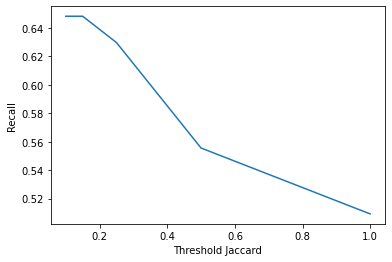

[0.1318267419962335, 0.13916500994035785, 0.14376321353065538, 0.1749271137026239, 0.1971326164874552]


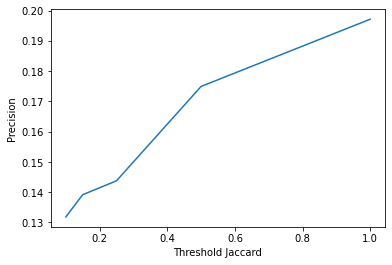

[0.9945218412761145, 0.994829232947996, 0.9951146680718858, 0.9963661913074027, 0.9969590181031738]


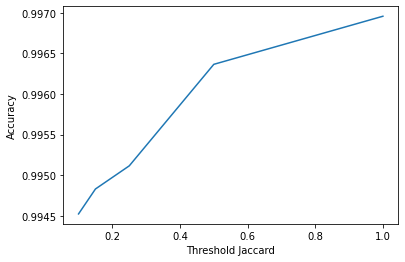

In [ ]:
threshold_array = [0.1, 0.15, 0.25, 0.5, 1.0]
recall_array = [x[0] for x in jc_evaluate]
print(recall_array)
plt.plot(threshold_array, recall_array)
plt.xlabel("Threshold Jaccard")
plt.ylabel("Recall")
plt.show()

threshold_array = [0.1, 0.15, 0.25, 0.5, 1.0]
prec_array = [x[1] for x in jc_evaluate]
print(prec_array)
plt.plot(threshold_array, prec_array)
plt.xlabel("Threshold Jaccard")
plt.ylabel("Precision")
plt.show()

threshold_array = [0.1, 0.15, 0.25, 0.5, 1.0]
acc_array = [x[2] for x in jc_evaluate]
print(acc_array)
plt.plot(threshold_array, acc_array)
plt.xlabel("Threshold Jaccard")
plt.ylabel("Accuracy")
plt.show()

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

In [ ]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)

merged_df_backup = merged_df.copy()
merged_list = merged_df_backup.values.tolist()
merged_list_two_cols = [[x[0], x[1]] for x in merged_list]
#print(merged_list_two_cols)
#print(merged_list_two_cols[0][0])

# its int
#print(type(merged_list_two_cols[0][0]))
#print(type(merged_list_two_cols[230][0]))

# this works!
#j_preds = nx.jaccard_coefficient(G2, [('1', '2'), ('1', '3'), ('1', '4')])
#for u,v,p in j_preds:
#    print(u, v, p)

# this works too!
#j_preds = nx.jaccard_coefficient(G2, [('1', '2'), ('1', '3'), ('1', '4')])
#for j_pred in j_preds:
#    print(j_pred[2])

# this works!
#j_pred = nx.jaccard_coefficient(G2, [('1', '2')])
#tp = j_pred
#print(tp)
#for u,v,p in tp:
#    print(p)

# works!!!!
#j_pred = nx.jaccard_coefficient(G2, [('1', '2')])
#mylist = [x for x in j_pred]
#print(mylist)
#print(mylist[0][0])
#tmp = mylist[0][0]
#print(tmp)

counter = 0
for row in merged_list_two_cols:
    str_row = [str(x) for x in row]
    tuple_row = (str_row[0], str_row[1])
    tmp_list_t = []
    tmp_list_t.append(tuple_row)
    j_preds = nx.jaccard_coefficient(G2, tmp_list_t)
    tmp_list = [x for x in j_preds]
    merged_list[counter].append(tmp_list[0][2])
    pr_att = nx.preferential_attachment(G2, tmp_list_t)
    tmp_list = [x for x in pr_att]
    merged_list[counter].append(tmp_list[0][2])
    res_allo = nx.resource_allocation_index(G2, tmp_list_t)
    tmp_list = [x for x in res_allo]
    merged_list[counter].append(tmp_list[0][2])
    counter += 1

    
columns_arr = ["Node1", "Node2", "Link", "Jacc.Coeff", "Pr.Attachment", "Resource Allocation"]
merged_df_backup_additions = pd.DataFrame(merged_list, columns = columns_arr)
print(merged_df_backup_additions)


<class 'int'>
        Node1  Node2  Link  Jacc.Coeff  Pr.Attachment  Resource Allocation
0           1      2     1         0.0              1             0.000000
1           1      3     1         0.0              2             0.000000
2           1      4     1         0.0              1             0.000000
3           3      4     1         0.5              2             0.142857
4           3      5     1         0.0              4             0.000000
...       ...    ...   ...         ...            ...                  ...
184455    430    425     0         0.0              1             0.000000
184456    430    426     0         0.0              1             0.000000
184457    430    427     0         0.0              1             0.000000
184458    430    429     0         1.0              1             0.500000
184459    430    430     0         1.0              1             0.500000

[184460 rows x 6 columns]


In [ ]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient

#Preferential Attachment

#Resource Allocation

<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [ ]:
#uncomment whole cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = merged_df_backup[['Node1', 'Node2']]            #features, uncomment and complete
y = merged_df_backup['Link']    #target, uncomment and complete

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) #uncomment and complete

In [ ]:
#uncomment whole cell
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [ ]:
model.fit(X_train_scaled, y_train)#train the model, uncomment and complete

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [ ]:
predictions = model.predict(X_test_scaled)       #uncomment
predictions[0:2] #get (A.M. last digit) first predictions, uncomment and complete

array([0, 0], dtype=int64)

In [ ]:
predict_proba = model.predict_proba(X_test_scaled) #uncomment and complete
print(predict_proba[270:278])
print(predict_proba[275])

[[9.99735990e-01 2.64010440e-04]
 [9.99863945e-01 1.36054644e-04]
 [9.99893779e-01 1.06220540e-04]
 [9.99654124e-01 3.45875512e-04]
 [9.99850350e-01 1.49650161e-04]
 [1.00000000e+00 0.00000000e+00]
 [9.99723969e-01 2.76030916e-04]
 [9.98904179e-01 1.09582056e-03]]
[1. 0.]


In [ ]:
# prepei na vrw to index gt dn to orisa ws tuple twn nodes
# gia praktikes dyskolies...
merged_df_backup[['Node1', 'Node2']]
picked_rows = merged_df_backup.loc[(merged_df['Node1'] == 1) & (merged_df['Node2'] == 47)]
picked_index = picked_rows.index
print(picked_index)

Int64Index([275], dtype='int64')


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [10]:
#install node2vec with conda / pip
import sys
if 'google.colab' in sys.modules:
  %pip install node2vec

from node2vec import Node2Vec   #uncomment
import multiprocessing          #uncomment

#generate walks
node2vec_walker = Node2Vec(G2, p=1.0, q=1.0, dimensions=128, num_walks=10, walk_length=80, workers=multiprocessing.cpu_count()) #uncomment and complete

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1) #uncomment and complete

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [11]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(merged_df['Node1'], merged_df['Node2'])]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, merged_df['Link'], random_state = 0)  #uncomment and complete

In [16]:
#uncomment whole cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train, y_train)   #uncomment and complete

predictions = classifier.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [18]:
pr_pr = classifier.predict_proba(X_test)
print(pr_pr[270:278])
print(pr_pr[275])
# seems about right

[[9.99404160e-01 5.95840476e-04]
 [9.99404160e-01 5.95840476e-04]
 [9.99404160e-01 5.95840476e-04]
 [9.99337759e-01 6.62241383e-04]
 [9.99337759e-01 6.62241383e-04]
 [9.99404160e-01 5.95840476e-04]
 [9.99404160e-01 5.95840476e-04]
 [9.99404160e-01 5.95840476e-04]]
[9.99404160e-01 5.95840476e-04]


In [20]:
accuracy_score(y_test, predictions)

0.9987174191865394

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>